<a href="https://colab.research.google.com/github/Theophilus04/Hola/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bagging

In [124]:
pip install mlxtend

In [125]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

In [126]:
data = load_iris()

In [127]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [128]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [129]:
d = {
    'sepal length': data.data[50:, 1],
     'petal length': data.data[50:, 2],
     'species': np.array([i for i in data.target if i > 0])
    
}

In [130]:
df = pd.DataFrame(d)
df

,sepal length,petal length,species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [131]:
# now will shuffle our dataset
df = df.sample(df.shape[0])
df

,sepal length,petal length,species
19,2.5,3.9,1
37,2.3,4.4,1
59,3.6,6.1,2
21,2.8,4.0,1
3,2.3,4.0,1
...,...,...,...
12,2.2,4.0,1
8,2.9,4.6,1
75,3.2,6.0,2
96,2.5,5.0,2


In [132]:
df_train = df.iloc[:60, :].sample(10)
df_test = df.iloc[61:, :].sample(10)

In [133]:
df_tt = df_test.sample(5, replace=True)

X_test = df_tt.iloc[:, :-1].values
y_test = df_tt.iloc[:,-1].values

In [134]:
# models -> Random Sample !
def evaluate(model, X, y):
  model.fit(X, y)
  plot_tree(model)

  plt.show()
  plot_decision_regions(X,y,model, legend=2)

  y_pred = model.predict(X_test)

  print("y_test : ", y_test)
  print("y_pred : ", y_pred)

  print("accuracy score", accuracy_score(y_test, y_pred))

  return model

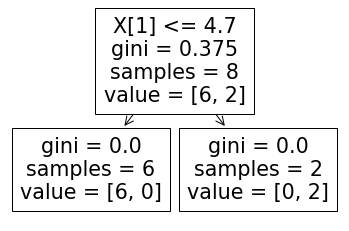

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


y_test :  [2 2 1 2 2]
y_pred :  [2 2 1 2 2]
accuracy score 1.0


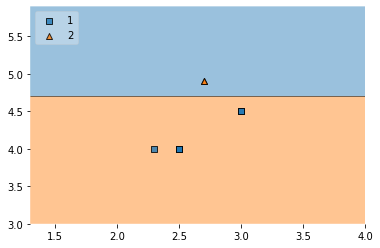

In [135]:
# first tree

df_t = df_train.sample(8, replace=True)

X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

dt = DecisionTreeClassifier()
bag1 = evaluate(dt, X_train, y_train)

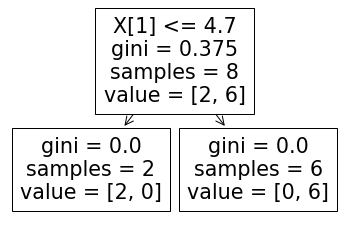

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


y_test :  [2 2 1 2 2]
y_pred :  [2 2 1 2 2]
accuracy score 1.0


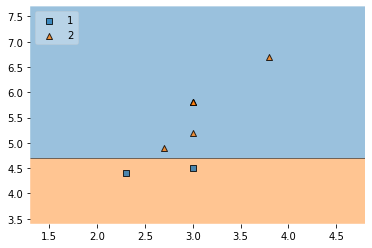

In [136]:
# second tree

df_t = df_train.sample(8, replace=True)

X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

dt = DecisionTreeClassifier()
bag2 = evaluate(dt, X_train, y_train)

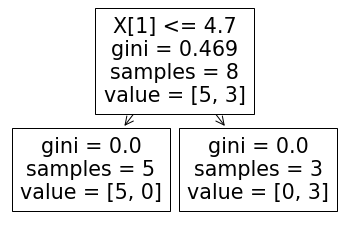

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


y_test :  [2 2 1 2 2]
y_pred :  [2 2 1 2 2]
accuracy score 1.0


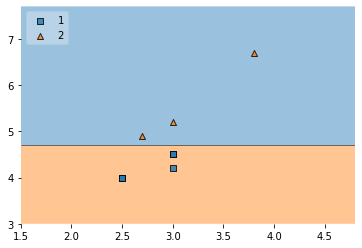

In [137]:
# third tree

df_t = df_train.sample(8, replace=True)

X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

dt = DecisionTreeClassifier()
bag3 = evaluate(dt, X_train, y_train)

In [138]:
print("Prediction 1", bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 2", bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 3", bag3.predict(np.array([2.5,4.9]).reshape(1,2)))

Prediction 1 [2]
Prediction 2 [2]
Prediction 3 [2]


Voting/Stacking

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

In [140]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = MultinomialNB()
m4 = GaussianNB()
m5 = DecisionTreeClassifier()

In [141]:
model = VotingClassifier([('knn',m1),('lr',m2),('mn',m3),('gn',m4),('dt',m5)                         
]
)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:,-1].values, test_size=0.33, random_state=42)

In [143]:
model.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('mn', MultinomialNB()), ('gn', GaussianNB()),
                             ('dt', DecisionTreeClassifier())])

In [144]:
model.score(X_train, y_train)*100

94.02985074626866

In [145]:
model.score(X_test, y_test)*100

93.93939393939394

Boosting

In [146]:
from sklearn.ensemble import AdaBoostClassifier

In [147]:
abc = AdaBoostClassifier(n_estimators=4, random_state=0)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [148]:
y_pred = abc.predict(X_test)

In [149]:
abc.score(X_test, y_pred)*100

100.0

In [150]:
accuracy_score(y_test, y_pred)*100

93.93939393939394